In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
train_test_split
from sklearn.tree import DecisionTreeClassifier
import dice_ml
from dice_ml.utils import helpers # helper functions
from dice_ml import Data,Model,Dice
import numpy as np
from xgboost import XGBClassifier
from joblib import Parallel, delayed


c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\dice_ml\utils\exception.py:12: UserWarning: UserConfigValidationException will be deprecated from dice_ml.utils. Please import UserConfigValidationException from raiutils.exceptions.
  warnings.warn("UserConfigValidationException will be deprecated from dice_ml.utils. "


In [2]:
dataframe_heart_disease = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

dataframe_heart_disease =  dataframe_heart_disease.dropna()
dataframe_heart_disease = dataframe_heart_disease[dataframe_heart_disease['chol'] !=0]
dataframe_heart_disease = dataframe_heart_disease[dataframe_heart_disease['trestbps'] !=0]

In [3]:
# Split the data into features and target label
y = dataframe_heart_disease.target
X = dataframe_heart_disease.drop(['target'], axis=1)

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

categorical = X_train.columns.difference(numerical)

In [6]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

transformations = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical),
        ('cat', categorical_transformer, categorical)])




In [7]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', transformations),
                      ('classifier', LogisticRegression())])
lr_model = clf.fit(X_train, y_train)


In [8]:
param_grid = {'classifier__C': [0.01, 0.1, 0.5 ,1, 5 , 10,100], 'classifier__penalty': ['l1', 'l2'],'classifier__solver': ['liblinear', 'saga'],'classifier__max_iter': [100, 500, 1000]}

In [9]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(lr_model, param_grid=param_grid, error_score='raise')
grid_search.fit(X_train, y_train)


# Print the best parameters and the score on the test set
print("Best parameters: ", grid_search.best_params_)
print("Test set score: ", grid_search.score(X_test, y_test))

c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters:  {'classifier__C': 0.5, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Test set score:  0.8284313725490197


In [10]:
# create the pipeline with the XGBClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', transformations),
    ('classifier', LogisticRegression(C=0.5, max_iter=100, penalty='l1', solver='saga'))
])


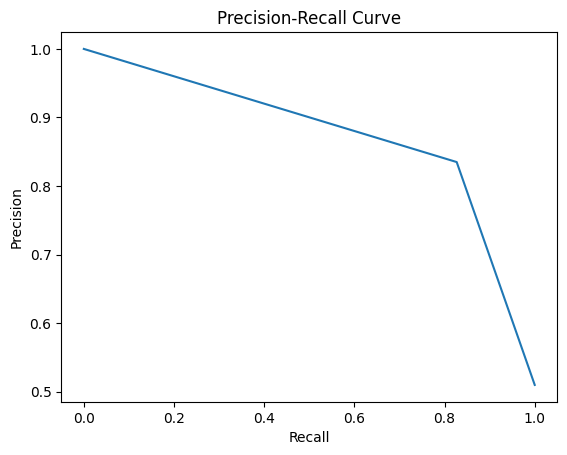

In [11]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
test_preds = pipeline.predict(X_test)

# Compute the precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, test_preds)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

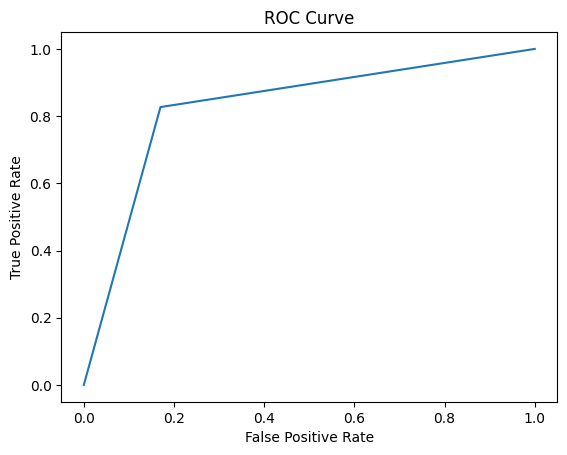

In [12]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
test_preds = pipeline.predict(X_test)

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, test_preds)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


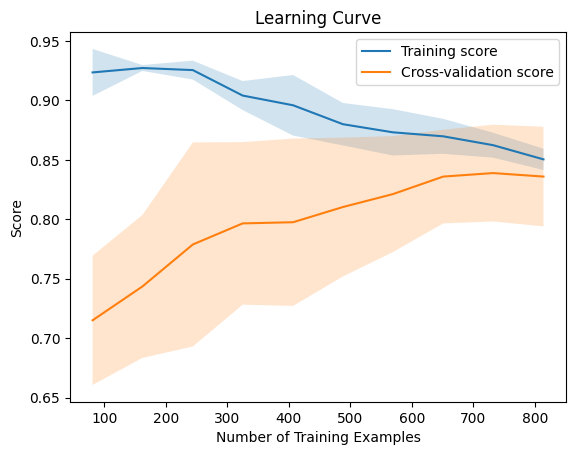

In [13]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define the number of training examples to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, train_sizes=train_sizes, cv=5)

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve')
plt.xlabel('Number of Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


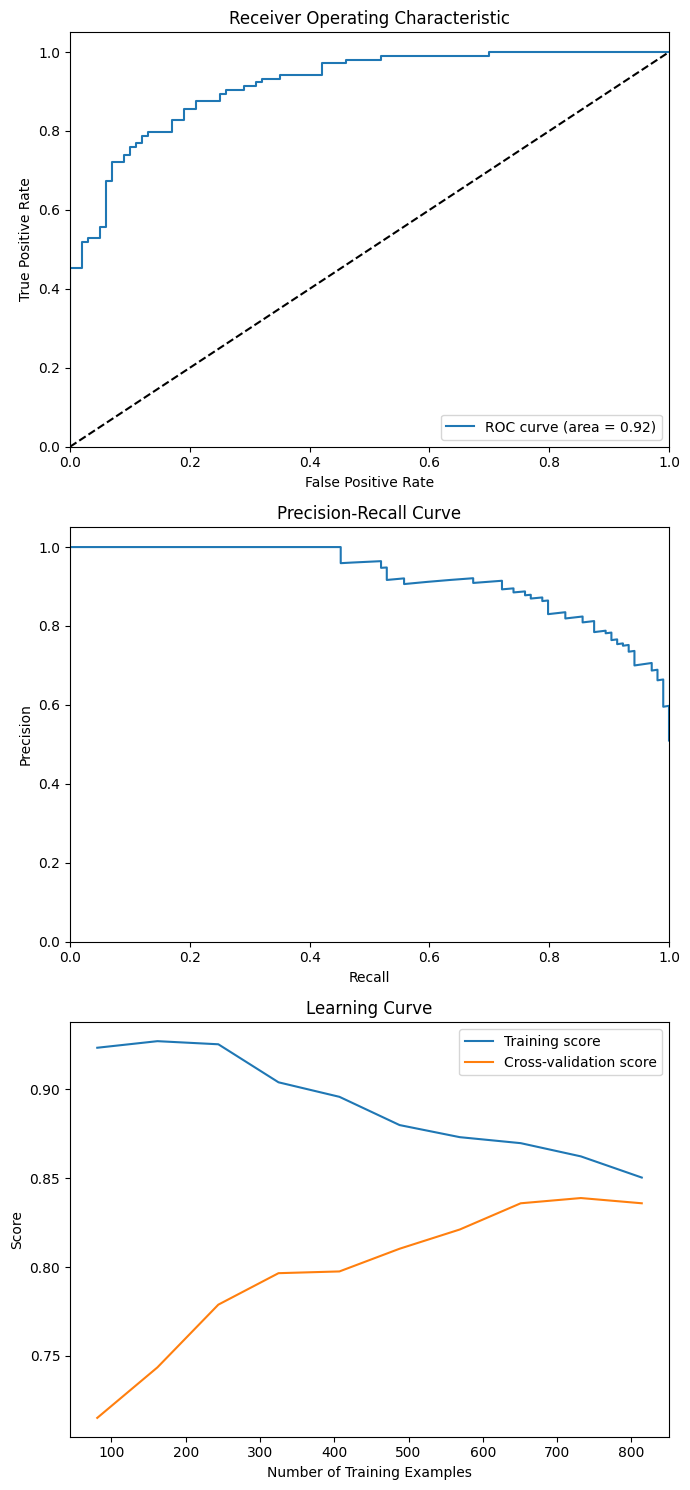

In [14]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
# Assuming clf is your trained classifier and X_test is your test data
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Compute the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Create a 3 by 1 grid of plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 15))

# Plot the ROC curve
ax1.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic')
ax1.legend(loc="lower right")

# Plot the Precision-Recall curve
ax2.plot(recall, precision)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')

# Plot the learning curve
ax3.plot(train_sizes, train_mean, label='Training score')
ax3.plot(train_sizes, test_mean, label='Cross-validation score')
ax3.set_xlabel('Number of Training Examples')
ax3.set_ylabel('Score')
ax3.set_title('Learning Curve')
ax3.legend(loc='best')

# Display the plots
plt.tight_layout()
plt.show()

c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


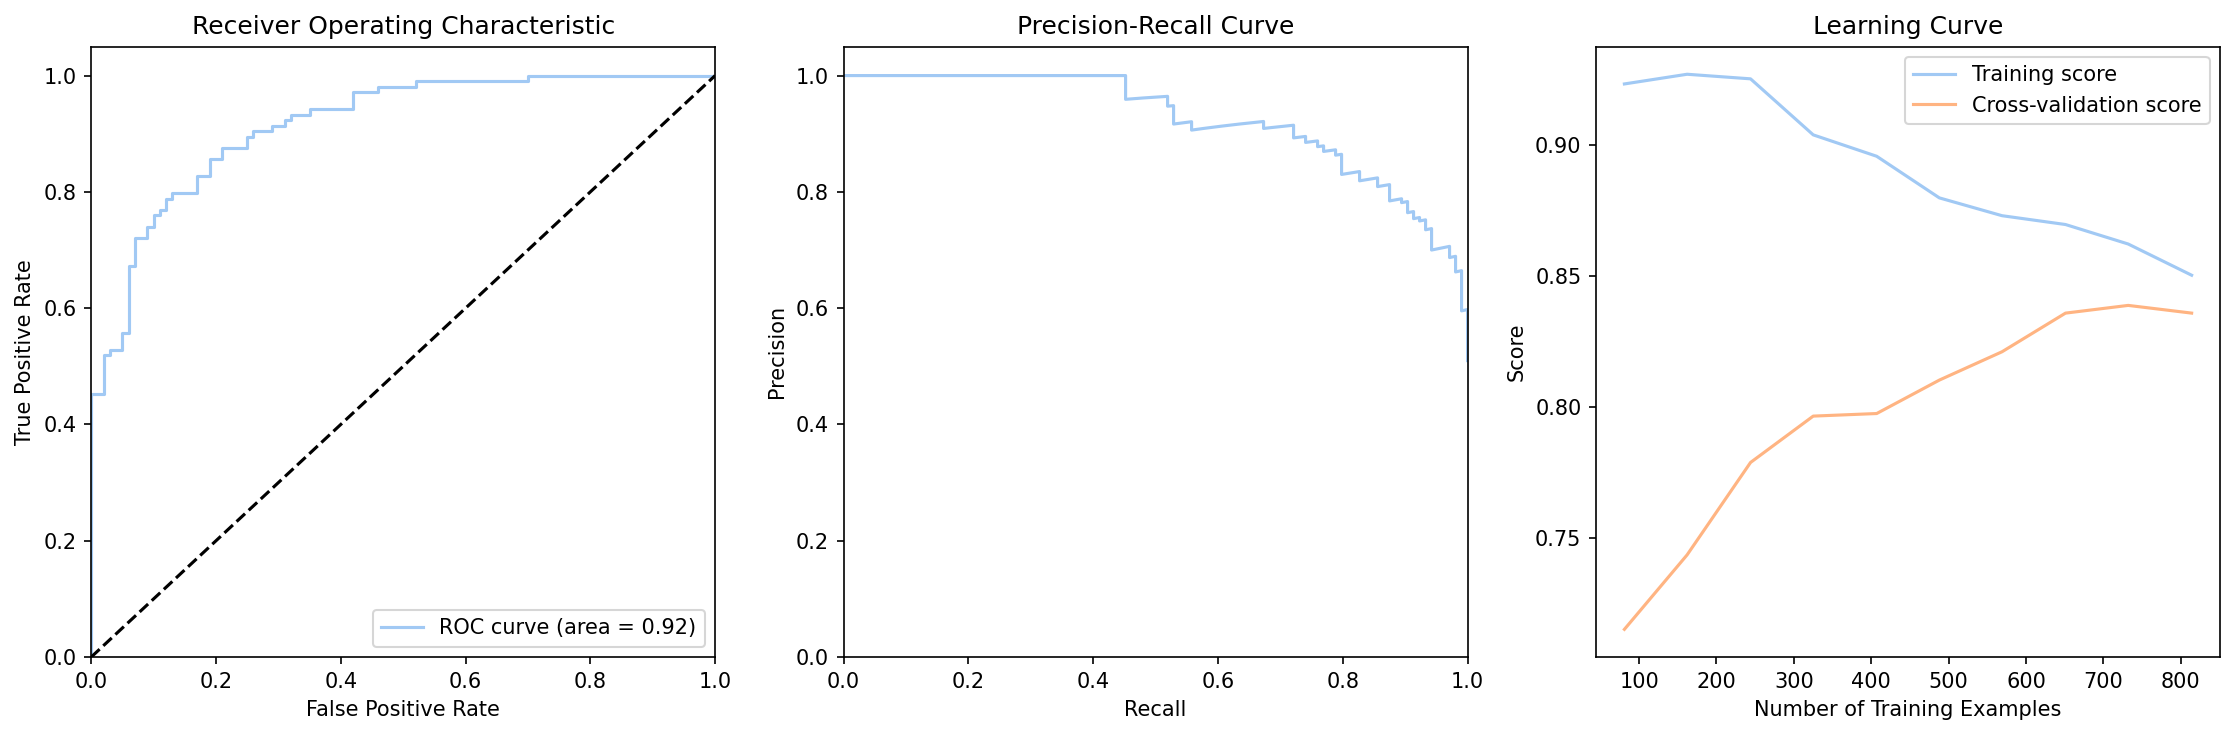

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.model_selection import learning_curve

# Assuming pipeline is your trained classifier and X_test is your test data
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Compute the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Create a 1 by 3 grid of plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot the ROC curve
ax1.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic')
ax1.legend(loc="lower right")

# Plot the Precision-Recall curve
ax2.plot(recall, precision)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')

# Plot the learning curve
ax3.plot(train_sizes, train_mean, label='Training score')
ax3.plot(train_sizes, test_mean, label='Cross-validation score')
ax3.set_xlabel('Number of Training Examples')
ax3.set_ylabel('Score')
ax3.set_title('Learning Curve')
ax3.legend(loc='best')

# Display the plots
plt.tight_layout()
plt.show()

In [12]:
{'chol': 0.9764865197587098, 'thalach': 0.9347531700110796, 'age': 0.9297057737289179, 'trestbps': 0.8015511510525668, 'oldpeak': 0.44897205465960854, 'cp': 0.3046903853256186, 'restecg': 0.2611104271820756, 'slope': 0.19389388157084822, 'sex': 0.13997291641019327, 'exang': 0.12310722639418933, 'fbs': 0.11338175550904839}


{'chol': 0.9764865197587098,
 'thalach': 0.9347531700110796,
 'age': 0.9297057737289179,
 'trestbps': 0.8015511510525668,
 'oldpeak': 0.44897205465960854,
 'cp': 0.3046903853256186,
 'restecg': 0.2611104271820756,
 'slope': 0.19389388157084822,
 'sex': 0.13997291641019327,
 'exang': 0.12310722639418933,
 'fbs': 0.11338175550904839}

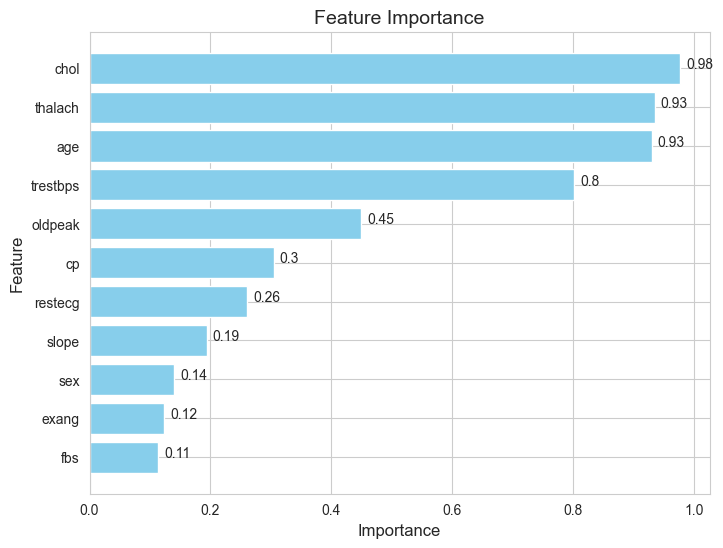

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dictionary
data = {
    'chol': 0.9764865197587098,
    'thalach': 0.9347531700110796,
    'age': 0.9297057737289179,
    'trestbps': 0.8015511510525668,
    'oldpeak': 0.44897205465960854,
    'cp': 0.3046903853256186,
    'restecg': 0.2611104271820756,
    'slope': 0.19389388157084822,
    'sex': 0.13997291641019327,
    'exang': 0.12310722639418933,
    'fbs': 0.11338175550904839
}

# Set the figure size and style
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')

# Create a horizontal bar chart
plt.barh(list(data.keys()), list(data.values()), align='center', color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()

# Add annotations to the bars
for i, v in enumerate(data.values()):
    plt.text(v + 0.01, i, str(round(v, 2)), fontsize=10)

# Show the plot
plt.show()

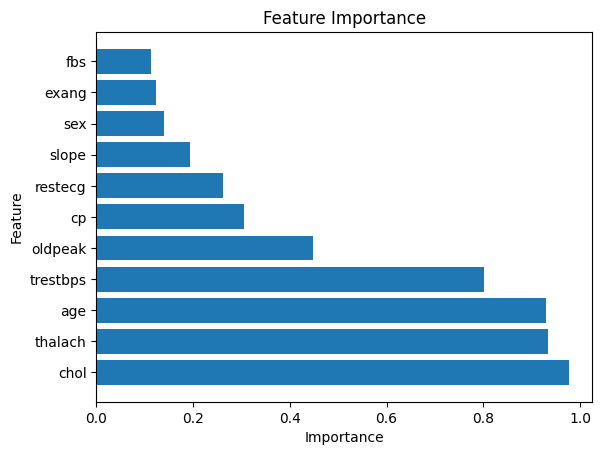

In [13]:
import matplotlib.pyplot as plt

# Define the dictionary
data = {'chol': 0.9764865197587098, 'thalach': 0.9347531700110796, 'age': 0.9297057737289179, 'trestbps': 0.8015511510525668, 'oldpeak': 0.44897205465960854, 'cp': 0.3046903853256186, 'restecg': 0.2611104271820756, 'slope': 0.19389388157084822, 'sex': 0.13997291641019327, 'exang': 0.12310722639418933, 'fbs': 0.11338175550904839}

# Create a horizontal bar chart
plt.barh(range(len(data)), list(data.values()), align='center')
plt.yticks(range(len(data)), list(data.keys()))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [14]:
# train the model on the entire training set
lr_pipeline = pipeline.fit(X_train, y_train)

# make predictions on the test set
y_pred = lr_pipeline.predict(X_test)


In [15]:
X_high_risk_tp = X_test[(y_pred == 1) & (y_test == 1)].reset_index().drop(['index'], axis=1)

In [16]:
train_data = pd.concat([X_train, y_train], axis=1)


# Create a DICE data object
d = Data(dataframe=pd.DataFrame(train_data, columns=dataframe_heart_disease.columns), continuous_features=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'],outcome_name='target')

# Create a DICE model object
m = Model(model=lr_pipeline, backend="sklearn")

In [27]:
# Create a DICE explainer object and generate an explanation
'''
exp = Dice(d, m,method = "genetic").generate_counterfactuals(test_instance, total_CFs=20, desired_class="opposite",
                                                            features_to_vary=["trestbps", "chol", "thalach"],algorithm = "DiverseCF",feature_weights="inverse_mad",permitted_range = {"trestbps": [80, test_instance['trestbps'].values[0]-1], "chol": [100, test_instance['chol'].values[0]-1], "thalach": [70,220- test_instance['age'].values[0]]},
                                                            proximity_weight=2,diversity_weight=3, sparsity_weight = 2,posthoc_sparsity_algorithm="binary",posthoc_sparsity_param =0.1,maxiterations=10)
 
# Print the explanation
print(exp.visualize_as_dataframe())'''


'\nexp = Dice(d, m,method = "genetic").generate_counterfactuals(test_instance, total_CFs=20, desired_class="opposite",\n                                                            features_to_vary=["trestbps", "chol", "thalach"],algorithm = "DiverseCF",feature_weights="inverse_mad",permitted_range = {"trestbps": [80, test_instance[\'trestbps\'].values[0]-1], "chol": [100, test_instance[\'chol\'].values[0]-1], "thalach": [70,220- test_instance[\'age\'].values[0]]},\n                                                            proximity_weight=2,diversity_weight=3, sparsity_weight = 2,posthoc_sparsity_algorithm="binary",posthoc_sparsity_param =0.1,maxiterations=10)\n \n# Print the explanation\nprint(exp.visualize_as_dataframe())'

In [69]:
from joblib import Parallel, delayed

df_no_counterfactuals = pd.DataFrame(columns=X_high_risk.columns)

# Define a function to generate a single counterfactual example
def generate_cf(test_instance):
    try:
        return Dice(d, m, method="genetic").generate_counterfactuals(test_instance, total_CFs=1, desired_class="opposite",
                                                                     features_to_vary=["trestbps", "chol", "thalach"],
                                                                     permitted_range={"trestbps": [80,120],
                                                                                      "chol": [150, 200],
                                                                                      "thalach": [120, 220 - test_instance['age'].values[0]]},
                                                                     maxiterations=10)
    except Exception as e:
        print("No counterfactuals found for test instance:", test_instance)
        df_no_counterfactuals.append(test_instance)
        return None

# Generate counterfactual examples in parallel using joblib
num_cores = 8  # Set the number of CPU cores to use
results = Parallel(n_jobs=num_cores)(delayed(generate_cf)(test_instance) for i in range(5))

# Print the explanations
for exp in results:
    if exp is not None:
        print(exp.visualize_as_dataframe())


All Countefactuals Found

In [86]:
def generate_cf(test_instance):
    try:
        return Dice(d, m,method='genetic').generate_counterfactuals(test_instance, total_CFs=20, desired_class="opposite",
                                                            features_to_vary=["trestbps", "chol", "thalach"],
                                                            diversity_weight = 5, proximity_weight = 2, sparsity_weight = 5   
                                                            #permitted_range={"trestbps": [80,120],  "chol": [100, 200], "thalach": [70, 220 - test_instance['age'].values[0]]},
                                                            )
 
    except Exception as e:
        print("No counterfactuals found for test instance:", test_instance)
        df_no_counterfactuals.append(test_instance)
        return None

With Ideal Constraints

In [21]:
import threading
import queue

df_no_counterfactuals = pd.DataFrame(columns=X_high_risk_tp.columns)
def generate_cf(test_instance, timeout=10):
    q = queue.Queue()

    def target():
        try:
            result = Dice(d, m, method='genetic').generate_counterfactuals(test_instance, total_CFs=3, desired_class="opposite",
                                                                           features_to_vary=["trestbps", "chol", "thalach"],
                                                                           #diversity_weight=5, proximity_weight=2, sparsity_weight=5,
                                                                           permitted_range={"trestbps": [80, 120], "chol": [150, 200], "thalach": [120, 220 - test_instance['age'].values[0]]}
                                                                           )
            q.put(result)
        except Exception as e:
            print("No counterfactuals found for test instance:", test_instance)
            df_no_counterfactuals.append(test_instance)
            q.put(None)

    # Start a new thread to run the target function
    thread = threading.Thread(target=target)
    thread.start()

    # Wait for the thread to finish or raise a timeout exception
    thread.join(timeout)

    if thread.is_alive():
        # The thread is still running, so raise a timeout exception
        print("No counterfactuals found for test instance-timed out:", test_instance)
        df_no_counterfactuals.append(test_instance)
        q.put(None)
    else:
        # The thread has finished, so return the result
        return q.get()

In [24]:

exps_ideal = []
num_cores = -1

# Iterate over each instance of X_high_risk and generate counterfactuals
for i in range(len(X_high_risk_tp)):
    test_instance = X_high_risk_tp.iloc[[i]]
    print(i)
    exp = Parallel(n_jobs=num_cores)(delayed(generate_cf)(test_instance) for i in range(1))
    exps_ideal.append(exp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85


In [25]:
num_none = sum(exp[0] is None for exp in exps_ideal)
print("Number of None values in exps_ideal:", num_none)

Number of None values in exps_ideal: 48


In [31]:
print((85- num_none)/85)

0.43529411764705883


In [27]:
validity_list = []
for exps in exps_ideal:
    
    if exps[0] is not None:
       exp_df = exps[0].cf_examples_list[0].final_cfs_df
       validity_list.append(lr_pipeline.predict(exp_df)[0])

In [29]:
percentage = sum(validity_list) / len(validity_list) * 100
print("Number of Valid Ideal Counterfactuals: {:.2f}%".format(100-percentage))

Number of Valid Ideal Counterfactuals: 100.00%


With Feasible Constraints

In [32]:
X_high_risk_tp = X_test[(y_pred == 1) & (y_test == 1)].reset_index().drop(['index'], axis=1)
#df_no_counterfactuals = X_high_risk_tp.loc[[exp[0] is None for exp in exps_ideal]]

In [33]:
import threading
import queue

#df_no_feasible_counterfactuals = pd.DataFrame(columns=df_no_counterfactuals.columns)

def generate_cf_feasible(test_instance, timeout=60):
    q = queue.Queue()

    def target():
        try:
            result = Dice(d, m, method='genetic').generate_counterfactuals(test_instance, total_CFs=5, desired_class="opposite",
                                                                           features_to_vary=["trestbps", "chol", "thalach"],
                                                                           #diversity_weight=5, proximity_weight=2, sparsity_weight=5,
                                                                           permitted_range={"trestbps": [80, 149],
                                                                                            "chol": [150, test_instance['chol'].values[0]-0.1*test_instance['chol'].values[0]],
                                                                                            "thalach": [120, 220 - test_instance['age'].values[0]]}                                                                           )
            q.put(result)
        except Exception as e:
            print("No counterfactuals found for test instance:", test_instance)
            df_no_feasible_counterfactuals.append(test_instance)
            q.put(None)

    # Start a new thread to run the target function
    thread = threading.Thread(target=target)
    thread.start()

    # Wait for the thread to finish or raise a timeout exception
    thread.join(timeout)

    if thread.is_alive():
        # The thread is still running, so raise a timeout exception
        print("No counterfactuals found for test instance-timed out:", test_instance)
        df_no_feasible_counterfactuals.append(test_instance)
        q.put(None)
    else:
        # The thread has finished, so return the result
        return q.get()

In [34]:
exps_feasible = []
num_cores = -1
df_no_counterfactuals_feasible = pd.DataFrame(columns=X_high_risk_tp.columns)
# Iterate over each instance of X_high_risk and generate counterfactuals
for i in range(len(X_high_risk_tp)):
    test_instance = X_high_risk_tp.iloc[[i]]
    print(i)   
    exp = Parallel(n_jobs=num_cores)(delayed(generate_cf_feasible)(test_instance) for i in range(1))
    exps_feasible.append(exp)

0


In [ ]:
num_none = sum(exp[0] is None for exp in exps_feasible)
print("Number of None values in exps_feasible:", num_none)

Finding CF's

In [87]:
exps_ = []
num_cores = -1
df_no_counterfactuals = pd.DataFrame(columns=X_high_risk_tp.columns)
# Iterate over each instance of X_high_risk and generate counterfactuals
for i in range(len(X_high_risk_tp)):
    test_instance = X_high_risk_tp.iloc[[i]]
    print(i)
    #exp = generate_cf(test_instance)
    # Generate counterfactual examples in parallel using joblib
    #num_cores = 8  # Set the number of CPU cores to use
    exp = Parallel(n_jobs=num_cores)(delayed(generate_cf)(test_instance) for i in range(1))
    exps_.append(exp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96


In [88]:
df_no_counterfactuals = X_high_risk_tp.loc[[exp[0] is None for exp in exps_]]

In [89]:
df_no_counterfactuals

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope


In [125]:
test_instance = X_high_risk[45:46]

In [127]:
test_instance

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
45,60,1,4,130,186,1,1,140,1,0.5,2


In [137]:
imp = Dice(d, m,method='genetic').local_feature_importance(test_instance, posthoc_sparsity_param=None)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


In [138]:
imp.local_importance

[{'age': 1.0,
  'thalach': 1.0,
  'oldpeak': 1.0,
  'trestbps': 0.9,
  'chol': 0.8,
  'fbs': 0.3,
  'restecg': 0.3,
  'exang': 0.2,
  'cp': 0.1,
  'sex': 0.0,
  'slope': 0.0}]

In [140]:
cobj = Dice(d, m,method='genetic').global_feature_importance(X_train, total_CFs=10, posthoc_sparsity_param=None)
print(cobj.summary_importance)

  0%|          | 0/814 [00:00<?, ?it/s]

100%|██████████| 814/814 [53:40<00:00,  3.96s/it]  


{'chol': 0.9764865197587098, 'thalach': 0.9347531700110796, 'age': 0.9297057737289179, 'trestbps': 0.8015511510525668, 'oldpeak': 0.44897205465960854, 'cp': 0.3046903853256186, 'restecg': 0.2611104271820756, 'slope': 0.19389388157084822, 'sex': 0.13997291641019327, 'exang': 0.12310722639418933, 'fbs': 0.11338175550904839}


In [129]:
xgb_pipeline.predict(test_instance)

array([1])

In [128]:
# Generate counterfactual examples in parallel using joblib
num_cores = 8  # Set the number of CPU cores to use
results = Parallel(n_jobs=num_cores)(delayed(generate_cf)(test_instance) for i in range(5))

# Print the explanations
for exp in results:
    if exp is not None:
        print(exp.visualize_as_dataframe())

KeyboardInterrupt: 

In [23]:
from joblib import Parallel, delayed

# Define a function to generate a single counterfactual example
def generate_cf(test_instance):
   
    return Dice(d, m, method="genetic").generate_counterfactuals(test_instance, total_CFs=1, desired_class="opposite",
                                                                    features_to_vary=["trestbps", "chol", "thalach"],
                                                                    permitted_range={"trestbps": [80,120],
                                                                                    "chol": [100, 200],
                                                                                    "thalach": [70, 220 - test_instance['age'].values[0]]},
                                                                    maxiterations=100)

# Generate counterfactual examples in parallel using joblib
num_cores = 8  # Set the number of CPU cores to use
results = Parallel(n_jobs=num_cores)(delayed(generate_cf)(test_instance) for i in range(5))

# Print the explanations
for exp in results:
    print(exp.visualize_as_dataframe())

UserConfigValidationException: No counterfactuals found for any of the query points! Kindly check your configuration.

In [ ]:
from joblib import Parallel, delayed
import pandas as pd
# Generate counterfactual examples in parallel using joblib
num_cores = 8  # Set the number of CPU cores to use
# Define a function to generate a single counterfactual example
def generate_cf(test_instance):
    try:
        print("finding counterfactuals with permitted range...")
        return Dice(d, m, method="genetic").generate_counterfactuals(test_instance, total_CFs=1, desired_class="opposite",
                                                                     features_to_vary=["trestbps", "chol", "thalach"],
                                                                     permitted_range={"trestbps": [80, test_instance['trestbps'].values[0]-1],
                                                                                      "chol": [100, test_instance['chol'].values[0]-1],
                                                                                      "thalach": [70, 220 - test_instance['age'].values[0]]},
                                                                     proximity_weight=10,diversity_weight=2, sparsity_weight = 2,posthoc_sparsity_algorithm="binary",posthoc_sparsity_param =0.1,
                                                                     maxiterations=100)
    except Exception as e:
        print("No counterfactuals found with permitted range. Generating counterfactuals without permitted range...")
        return Dice(d, m, method="genetic").generate_counterfactuals(test_instance, total_CFs=1 , desired_class="opposite",
                                                                     features_to_vary=["trestbps", "chol", "thalach"],proximity_weight=10,diversity_weight=2, sparsity_weight = 2,posthoc_sparsity_algorithm="binary",posthoc_sparsity_param =0.1,
                                                                     maxiterations=10)


results = Parallel(n_jobs=num_cores)(delayed(generate_cf)(test_instance) for i in range(20))

# Merge the explanations into one dataframe
df = pd.concat([exp.cf_examples_list[0].final_cfs_df for exp in results]).drop_duplicates()

# Print the merged dataframe


In [21]:
# Create a DICE explainer object and generate an explanation

exp = Dice(d, m,method='genetic').generate_counterfactuals(test_instance, total_CFs=20, desired_class="opposite",
                                                            features_to_vary=["trestbps", "chol", "thalach"],permitted_range = {"trestbps": [80, 120], "chol": [100, 200], "thalach": [70,220- test_instance['age'].values[0]]}
                                                           )
 
# Print the explanation
print(exp.visualize_as_dataframe())


  0%|          | 0/1 [41:27<?, ?it/s]


KeyboardInterrupt: 

In [21]:
# Load the dataset and create a machine learning model
# ...

# Create a Dice explainer object with the Genetic method
dice = Dice(d, m, method='genetic')

exps_ = []

# Iterate over each instance of X_high_risk and generate counterfactuals
for i in range(len(X_high_risk)):
    test_instance = X_high_risk.iloc[[i]]
    try:
        exp = dice.generate_counterfactuals(test_instance, total_CFs=5, desired_class="opposite",
                                            features_to_vary=["trestbps", "chol", "thalach"], 
                                            permitted_range={"trestbps": [80, 130],
                                                            "chol": [100,200],
                                                            "thalach": [70, 220 - test_instance['age'].values[0]]},
                                            maxiterations=100)
    except Exception as e:
        exp =  Dice(d, m, method="genetic").generate_counterfactuals(test_instance, total_CFs=5, desired_class="opposite",
                                                                     features_to_vary=["trestbps", "chol", "thalach"],
                                                                     maxiterations=100)
        
    # Print the explanation
    print(f"Counterfactuals for instance {i}:")
    #print(exp.visualize_as_dataframe())
    exps_.append(exp)

100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


Counterfactuals for instance 0:


100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


Counterfactuals for instance 1:


100%|██████████| 1/1 [00:32<00:00, 32.02s/it]


Counterfactuals for instance 2:


100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Counterfactuals for instance 3:


100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Counterfactuals for instance 4:


100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Counterfactuals for instance 5:


100%|██████████| 1/1 [05:34<00:00, 334.30s/it]


Counterfactuals for instance 6:


100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Counterfactuals for instance 7:


  0%|          | 0/1 [1:53:43<?, ?it/s]


KeyboardInterrupt: 

In [51]:
exp_dice

In [24]:

exp_dfs = exp_dice.cf_examples_list[0].final_cfs_df

In [25]:
exp_dfs.drop(['target'], axis=1, inplace=True)

In [26]:
xgb_pipeline.predict(exp_dfs)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
test_instance['target'] = 1

C:\Users\praskulkarni\AppData\Local\Temp\ipykernel_20456\99395437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_instance['target'] = 1


In [28]:
chol_test = test_instance['chol'].values[0]
tres_test = test_instance['trestbps'].values[0]
thalach_test = test_instance['thalach'].values[0]

In [29]:
feasible_counterfactuals = exp_dfs[((exp_dfs['thalach'] > thalach_test) & (exp_dfs['thalach']< 220 - exp_dfs['age'])) & (exp_dfs['chol'] < chol_test) & (exp_dfs['trestbps'] < tres_test)]

For subjects with cholestestoral in range … and have target=0, their target would be 1 if cholesterol were greater than …
For subjects with cholesterol in range … and thalac in range … and target = 0, their target would be 1 if cholesterol were in range …. thalac were in range …
Monotonicity
Shape of the Curve between variables 
Cholestrol can either increase the chance or it has no effect
(Constrained XgBoost, Normalizing flows,Linear Models)

In [30]:
exp_dfs['target']=0

In [31]:
fact_and_counterfactual = pd.concat([test_instance,exp_dfs])

In [32]:
fact_and_counterfactual

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,59.0,1,1,160.0,273.0,0,2,125.0,0,0.0,1,1
0,59.0,1,1,106.0,176.0,0,2,125.0,0,0.0,1,0
0,59.0,1,1,105.0,176.0,0,2,125.0,0,0.0,1,0
0,59.0,1,1,105.0,173.0,0,2,125.0,0,0.0,1,0
0,59.0,1,1,103.0,180.0,0,2,125.0,0,0.0,1,0
0,59.0,1,1,102.0,185.0,0,2,125.0,0,0.0,1,0
0,59.0,1,1,100.0,182.0,0,2,125.0,0,0.0,1,0
0,59.0,1,1,100.0,182.0,0,2,125.0,0,0.0,1,0
0,59.0,1,1,100.0,178.0,0,2,125.0,0,0.0,1,0
0,59.0,1,1,100.0,175.0,0,2,125.0,0,0.0,1,0
